In [11]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle

In [3]:
# Import the data
X = pd.read_csv("../data/VerlanderOnly_X_train.csv").to_numpy()
y = pd.read_csv("../data/VerlanderOnly_y_train.csv").to_numpy().T[0]

In [5]:
grid_search_hp = {
    'hidden_layer_sizes' : [[100, 50, 25], [100, 200, 200, 100], [100, 50, 50, 25, 25, 10, 10]],
    'alpha' : [0.0001, 0.1, 1, 10],
    'learning_rate_init' : [0.0001, 0.001, 0.01],
    'max_iter' : [1000],
    'early_stopping' : [True],
    'n_iter_no_change' : [50],
}

model = MLPClassifier()

In [8]:
grid_search = GridSearchCV(model, grid_search_hp, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'alpha': [0.0001, 0.1, 1, 10],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [[100, 50, 25],
                                                [100, 200, 200, 100],
                                                [100, 50, 50, 25, 25, 10, 10]],
                         'learning_rate_init': [0.0001, 0.001, 0.01],
                         'max_iter': [1000], 'n_iter_no_change': [50]})

In [13]:
grid_search.best_params_

{'alpha': 0.1,
 'early_stopping': True,
 'hidden_layer_sizes': [100, 200, 200, 100],
 'learning_rate_init': 0.001,
 'max_iter': 1000,
 'n_iter_no_change': 50}

In [14]:
grid_search.best_estimator_

0.5958678236130868

In [26]:
# Import the data
X_test = pd.read_csv("../data/VerlanderOnly_X_test.csv").to_numpy()
y_test = pd.read_csv("../data/VerlanderOnly_y_test.csv").to_numpy().T[0]

In [27]:
grid_search.best_estimator_.score(X_test, y_test)

0.58967429953065

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

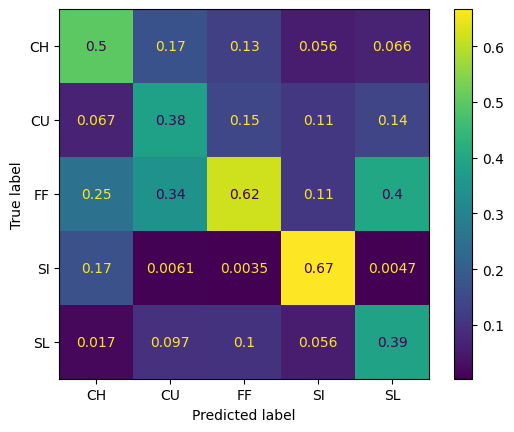

In [37]:
# "pred" - Probability: Given Predicted X, what is probability it is actually Y?
# "true" - Probability: Given Actually Y, what is probability we guessed X?
cm = confusion_matrix(y_test, 
                      grid_search.best_estimator_.predict(X_test), 
                      labels=grid_search.best_estimator_.classes_, 
                      normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_search.best_estimator_.classes_)
disp.plot()
plt.savefig("best_conf_matrix_col_nmlz.png")
plt.show()

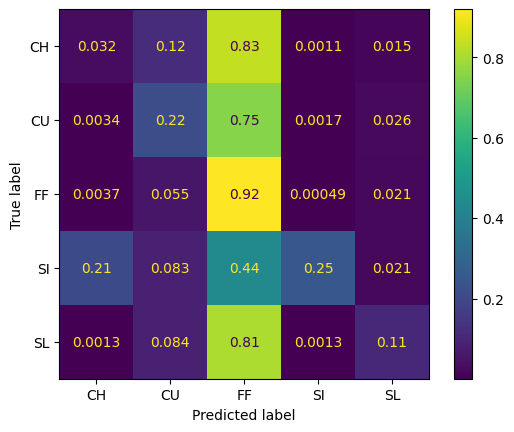

In [35]:
# "pred" - Probability: Given Predicted X, what is probability it is actually Y?
# "true" - Probability: Given Actually Y, what is probability we guessed X?
cm = confusion_matrix(y_test, 
                      grid_search.best_estimator_.predict(X_test), 
                      labels=grid_search.best_estimator_.classes_, 
                      normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_search.best_estimator_.classes_)
disp.plot()
plt.savefig("best_conf_matrix_row_nmlz.png")
plt.show()

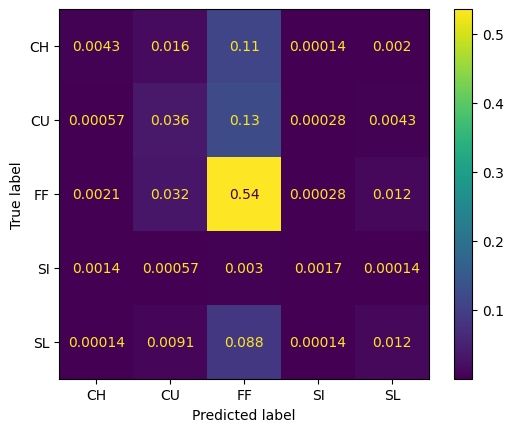

In [36]:
# "pred" - Probability: Given Predicted X, what is probability it is actually Y?
# "true" - Probability: Given Actually Y, what is probability we guessed X?
cm = confusion_matrix(y_test, 
                      grid_search.best_estimator_.predict(X_test), 
                      labels=grid_search.best_estimator_.classes_, 
                      normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_search.best_estimator_.classes_)
disp.plot()
plt.savefig("best_conf_matrix_all_nmlz.png")
plt.show()